In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
import os

In [24]:
model_name = "ColorizationWithPerception_100"
model_path = "/content/drive/MyDrive/CapstoneProject-AMMM/Models/" + model_name
model = load_model(model_path, compile=False)

In [25]:
def liveTest(img_path):
  batch_size = 64

  # Size of the image required to train our model
  img_size = 128

  c= []

  custom_image = Image.open(img_path).resize( ( img_size , img_size ) )
  # Normalize and greyscale
  custom_image = custom_image.convert( 'L' )
  custom_img_array = ( np.asarray( custom_image ).reshape( ( img_size , img_size ) ) ) / 255
  c.append( custom_img_array )
  custom_x = np.array(c)
  cust_x = np.repeat(custom_x[..., np.newaxis], 3, -1)
  pred = model(cust_x[0 : ] ).numpy()


  plt.figure(figsize=(10,10))
  or_image = plt.subplot(3,3,1)
  or_image.set_title('Grayscale Input', fontsize=16)
  plt.imshow(custom_x[0] , cmap='gray' )

  in_image = plt.subplot(3,3,2)    
  image = Image.fromarray( ( pred[0] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  image = np.asarray( image )
  in_image.set_title('Colorized Output', fontsize=16)
  plt.imshow( image )


  plt.show()



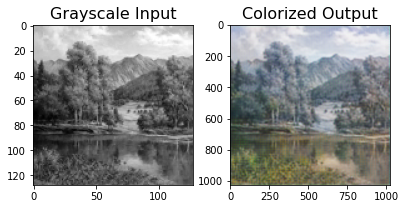

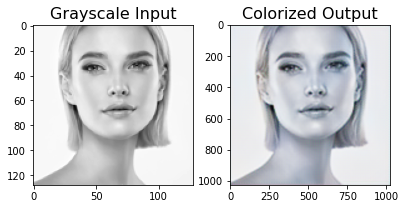

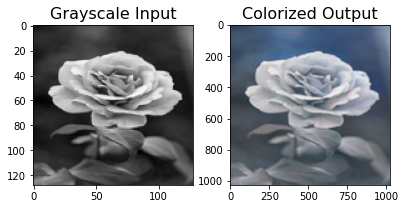

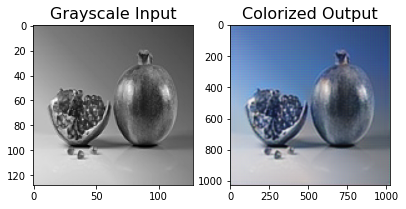

In [27]:
dir = "/content/drive/MyDrive/CapstoneProject-AMMM/SampleImages/"
n = 4
for i in range(n):
  sample = dir + str(i) + ".jpg"
  liveTest(sample)